In [2]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: June 24, 2024
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: June 24, 2024\n'

In [3]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import os
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
def read_data_from_toymodel(file_path):
    print("Reading data...\n")

    try:
        column_names = ['eventID', 'trackID', 'parentID', 'particleID', 'copyNb1 (mother volume)', 'copyNb', 'material', 'time (ns)', 'energy (MeV)', 'energy deposit (MeV)', 'parent process name', 'process name', 'px (MeV/c)', 'py (MeV/c)', 'pz (MeV/c)', 'step length (cm)', 'x (cm)', 'y (cm)', 'z (cm)']
        df = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)  # Assumes tab-separated values in the text file
 
        # Convert all columns to string data type
        df = df.astype(str)
        
        print("Grouping data...")
        # Group by eventID and trackID
        grouped_data = df.groupby(['eventID'])

        # Clear the data buffer
        del df

        print("Finished data reading!")
        return grouped_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse data from '{file_path}'. Please ensure the file has the correct format.")
        return None

In [4]:
data = read_data_from_toymodel("/NAS/JC/2024_simulation/2024/Daughter_anti_He3_1e3_TOI_all.dat")

Reading data...

Grouping data...
Finished data reading!


In [5]:
if data is not None:
    N_mu_plus = []
    N_mu_minus = []
    #He3_parent_ID_array = []
    try:
        event_keys = list(data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            data_track = data.get_group(event_keys[i])
            data_track = data_track.groupby(['trackID'])
            track_keys = list(data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            abnormal_daughter = 'NaN'
            # j is track ID
            for j in range(len(track_keys)):
                #abnormal_daughter = str(data_track.get_group(track_keys[j]).iloc[0]['parent process name'])
                #if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                #elif(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211' and str(data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                elif(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    mu_minus = mu_minus + 1
            #if(mu_plus + mu_minus == 0):
                #print(event_keys[i])
            N_mu_plus.append(mu_plus)
            N_mu_minus.append(mu_minus)
            #He3_parent_ID_array.append(abnormal_daughter)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


[##################################################] 100.00% 1000/1000

In [6]:
#print(He3_parent_ID_array)
#plt.hist(He3_parent_ID_array)

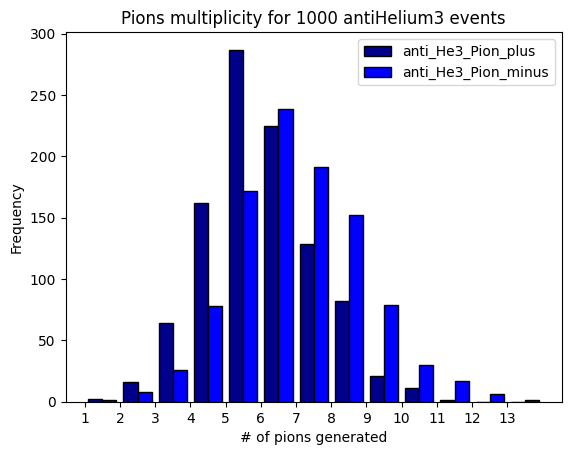

In [7]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_profile = [N_mu_plus, N_mu_minus]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus']
anti_He3_Pion_color = ['darkblue', 'blue']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = N_mu_plus + N_mu_minus
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(anti_He3_Pion_profile, bins=bins, label=anti_He3_Pion_label, color=anti_He3_Pion_color, edgecolor='black')

# Add labels and title
plt.xlabel('# of pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(N_mu_plus))+ ' antiHelium3 events')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Show the plot
plt.show()


In [8]:
# clear data cache
del data

In [9]:
proton_data = read_data_from_toymodel("/NAS/JC/2024_simulation/2024/Daughter_anti_proton_1e5_TOI.dat")

Reading data...

Grouping data...
Finished data reading!


In [10]:
if proton_data is not None:
    proton_N_mu_plus = []
    proton_N_mu_minus = []
    proton_parent_ID_array = []
    try:
        event_keys = list(proton_data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            proton_data_track = proton_data.get_group(event_keys[i])
            proton_data_track = proton_data_track.groupby(['trackID'])
            track_keys = list(proton_data_track.groups.keys())
            mu_plus = 0
            mu_minus = 0
            parent_ID = 'NaN'
            # j is track ID
            for j in range(len(track_keys)):
                #if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211'):
                    parent_ID = str(proton_data_track.get_group(track_keys[j]).iloc[0]['parentID'])
                    mu_plus = mu_plus + 1
                    # get the particle ID of this track
                    #print("first track of event", event_keys[i], "is", proton_data_track.get_group(track_keys[j]).iloc[0]['particleID'])
                #elif(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                elif(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '-211'):
                    parent_ID = str(proton_data_track.get_group(track_keys[j]).iloc[0]['parentID'])
                    mu_minus = mu_minus + 1
            proton_N_mu_plus.append(mu_plus)
            proton_N_mu_minus.append(mu_minus)
            proton_parent_ID_array.append(parent_ID)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# clear data cache
del proton_data


[##################################################] 100.00% 100000/100000

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+02,
        7.0000e+02, 1.7000e+03, 1.7000e+03, 4.4000e+03, 9.0000e+03,
        1.0900e+04, 1.4300e+04, 1.5100e+04, 1.3200e+04, 8.7000e+03,
        8.3000e+03, 5.6000e+03, 3.3000e+03, 1.4000e+03, 9.0000e+02,
        4.0000e+02, 1.0000e+02],
       [1.8940e+03, 9.8770e+03, 2.1023e+04, 3.6347e+04, 1.9723e+04,
        9.5170e+03, 1.5250e+03, 9.3000e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00]]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22.]), <a list of 2 BarContainer objects>)


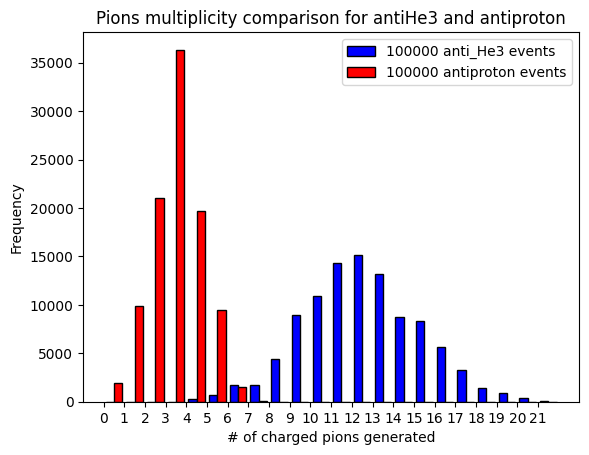

In [16]:
He3bar_charged_pion = np.array(N_mu_minus) + np.array(N_mu_plus)
He3bar_charged_pion = np.repeat(He3bar_charged_pion,100,axis=0)
protonbar_charged_pion = np.array(proton_N_mu_plus) + np.array(proton_N_mu_minus)

Charged_pion_comparison = [He3bar_charged_pion, protonbar_charged_pion]
Charged_pion_label = [f'{len(He3bar_charged_pion)} anti_He3 events', f'{len(protonbar_charged_pion)} antiproton events']
Charged_pion_color = ['blue', 'red']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = np.append(He3bar_charged_pion, protonbar_charged_pion)
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

test = plt.hist(Charged_pion_comparison, bins=bins, label=Charged_pion_label, color=Charged_pion_color, edgecolor='black')
print(test)
# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))


# Add labels and title
plt.xlabel('# of charged pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity comparison for antiHe3 and antiproton')

# Show the plot
plt.show()

In [13]:
print(np.sum(test[0][0][9:,]))
print(np.sum(test[0][1][9:,]))

912.0
0.0


In [31]:
# Save the array to a file
np.save('anti_He3_Pion_profile.npy', anti_He3_Pion_profile)
np.save('anti_proton_Pion_profile.npy', anti_proton_Pion_profile)

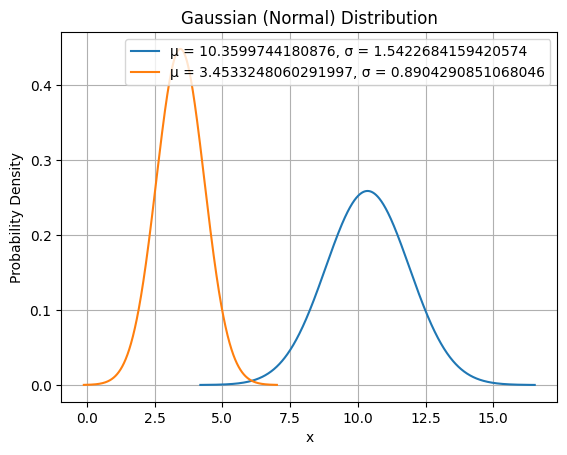

In [4]:
anti_He3_Pion_profile = np.load('anti_He3_Pion_profile.npy')
anti_proton_Pion_profile = np.load('anti_proton_Pion_profile.npy')

from scipy.stats import norm
"""
# Mean and standard deviation
#model A
anti_proton_mu = 2.65 + 3.65 * np.log(2) * 2/3
anti_deuteron_mu = 2.65 + 3.65 * np.log(4)
anti_He3_mu = 2.65 + 3.65 * np.log(6)

anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(anti_deuteron_mu * 0.174 * math.pow(4, 0.4))
anti_He3_sigma = np.sqrt(anti_He3_mu * 0.174 * math.pow(6, 0.4))
"""
#model B
anti_proton_mu = (2.65 + 3.65 * np.log(2)) * 2/3
anti_deuteron_mu = 2 * anti_proton_mu
anti_He3_mu = 3 * anti_proton_mu
anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(2) * anti_proton_sigma
anti_He3_sigma = np.sqrt(3) * anti_proton_sigma


# Create a range of x values (e.g., from mu - 4*sigma to mu + 4*sigma)
x1 = np.linspace(anti_He3_mu - 4*anti_He3_sigma, anti_He3_mu + 4*anti_He3_sigma, 1000)

# Calculate the Gaussian (normal) distribution values for each x
y1 = norm.pdf(x1, anti_He3_mu, anti_He3_sigma)

# Plot the Gaussian curve
plt.plot(x1, y1, label=f'μ = {anti_He3_mu}, σ = {anti_He3_sigma}')

# Create a range of x values (e.g., from mu - 4*sigma to mu + 4*sigma)
x2 = np.linspace(anti_proton_mu - 4*anti_proton_sigma, anti_proton_mu + 4*anti_proton_sigma, 1000)

# Calculate the Gaussian (normal) distribution values for each x
y2 = norm.pdf(x2, anti_proton_mu, anti_proton_sigma)

# Plot the Gaussian curve
plt.plot(x2, y2, label=f'μ = {anti_proton_mu}, σ = {anti_proton_sigma}')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian (Normal) Distribution')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Generate random numbers from the Gaussian distribution
anti_proton_corner_Charged_pion_model = np.random.normal(anti_proton_mu, anti_proton_sigma, size=1000)
anti_He3_corner_Charged_pion_model = np.random.normal(anti_He3_mu, anti_He3_sigma, size=1000)

#plt.hist(anti_He3_corner_Charged_pion_model)
#plt.hist(anti_proton_corner_Charged_pion_model)



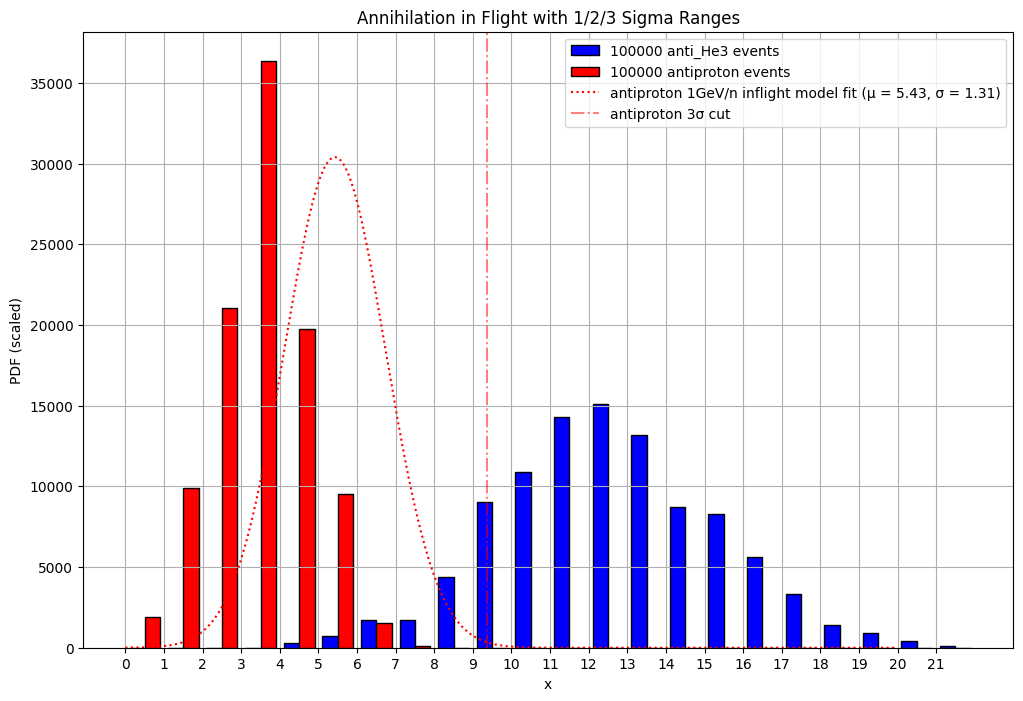

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Your data
He3bar_charged_pion = anti_He3_Pion_profile[0] + anti_He3_Pion_profile[1]
He3bar_charged_pion = np.repeat(He3bar_charged_pion, 100, axis=0)
protonbar_charged_pion = anti_proton_Pion_profile[0] + anti_proton_Pion_profile[1]

Charged_pion_comparison = [He3bar_charged_pion, protonbar_charged_pion]
Charged_pion_label = [f'{len(He3bar_charged_pion)} anti_He3 events', f'{len(protonbar_charged_pion)} antiproton events']
Charged_pion_color = ['blue', 'red']

# Determine the range of the data to set integer bins
all_values = np.append(He3bar_charged_pion, protonbar_charged_pion)
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

# Plot the histogram
plt.figure(1, figsize=(12, 8))
test = plt.hist(Charged_pion_comparison, bins=bins, label=Charged_pion_label, color=Charged_pion_color, edgecolor='black')  # Use density=True for normalized histogram

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Add labels and title
plt.xlabel('# of charged pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity comparison for antiHe3 and antiproton')

# Fit a Gaussian to one of the datasets (e.g., He3bar_charged_pion)
mu1, sigma1 = anti_He3_mu, anti_He3_sigma  # Calculate mean and std
x = np.linspace(min_value, max_value, 1000)  # Create x values for the Gaussian curve
y1 = norm.pdf(x, mu1, sigma1)  # Calculate the Gaussian PDF

# Plot the Gaussian curve
#plt.plot(x, 100000*y1, 'b--', label=f'anti_He3 model (μ = {mu1:.2f}, σ = {sigma1:.2f})')


# Fit a Gaussian to one of the datasets (e.g., He3bar_charged_pion)
mu2, sigma2 = anti_proton_mu, anti_proton_sigma # Calculate mean and std
y2 = norm.pdf(x, mu2, sigma2)  # Calculate the Gaussian PDF

# Plot the Gaussian curve
#plt.plot(x, 100000*y2, 'r--', label=f'antiproton model fit (μ = {mu2:.2f}, σ = {sigma2:.2f})')


# Define the x-axis range
x = np.linspace(0, 20, 1000)  # Adjust the range as needed

# Annihilation in flight (antiproton)
inflight_mu = (2.65 + 3.65 * np.log(4.5)) * 2/3
inflight_sigma = np.sqrt(inflight_mu * 0.174 * math.pow(4.5, 0.4))
mu3, sigma3 = inflight_mu, inflight_sigma  # Mean and std
y3 = norm.pdf(x, mu3, sigma3)  # Gaussian PDF
plt.plot(x, 100000*y3, color='r', linestyle='dotted', label=f'antiproton 1GeV/n inflight model fit (μ = {mu3:.2f}, σ = {sigma3:.2f})')

# Annihilation in flight (antiHe3)
inflight_mu = 3*(2.65 + 3.65 * np.log(2)) * 2/3
inflight_sigma = np.sqrt(inflight_mu * 0.174 * math.pow(6, 0.4))
mu4, sigma4 = inflight_mu, inflight_sigma  # Mean and std
y4 = norm.pdf(x, mu4, sigma4)  # Gaussian PDF
#plt.plot(x, 100000*y4, color='b', linestyle='dotted', label=f'antiHe3 inflight model fit (μ = {mu4:.2f}, σ = {sigma4:.2f})')

# Add 1/2/3 sigma ranges for antiproton (red)
#plt.axvline(mu3 - sigma3, color='r', linestyle='--', alpha=0.5, label='1σ (antiproton)')
#plt.axvline(mu3 + sigma3, color='r', linestyle='--', alpha=0.5)
#plt.axvline(mu3 - 2*sigma3, color='r', linestyle=':', alpha=0.5, label='2σ (antiproton)')
#plt.axvline(mu3 + 2*sigma3, color='r', linestyle=':', alpha=0.5)
#plt.axvline(mu3 - 3*sigma3, color='r', linestyle='-.', alpha=0.5, label='3σ (antiproton)')
plt.axvline(mu3 + 3*sigma3, color='r', linestyle='-.', alpha=0.5, label='antiproton 3σ cut')
"""
# Add 1/2/3 sigma ranges for antiHe3 (blue)
plt.axvline(mu4 - sigma4, color='b', linestyle='--', alpha=0.5, label='1σ (antiHe3)')
plt.axvline(mu4 + sigma4, color='b', linestyle='--', alpha=0.5)
plt.axvline(mu4 - 2*sigma4, color='b', linestyle=':', alpha=0.5, label='2σ (antiHe3)')
plt.axvline(mu4 + 2*sigma4, color='b', linestyle=':', alpha=0.5)
plt.axvline(mu4 - 3*sigma4, color='b', linestyle='-.', alpha=0.5, label='3σ (antiHe3)')
plt.axvline(mu4 + 3*sigma4, color='b', linestyle='-.', alpha=0.5)
"""
# Show the plot
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('PDF (scaled)')
plt.title('Annihilation in Flight with 1/2/3 Sigma Ranges')
plt.show()